# Starting guide

En esta clase nos basaremos en la starting guide de lenstronomy creada por Simon Birrer y disponible en:

https://github.com/sibirrer/lenstronomy_extensions/blob/master/lenstronomy_extensions/Notebooks/starting_guide.ipynb

Los objetivos de esta clase son:

1. Conocer los parametros basicos necesarios para iniciar el modulo LensModel
2. Conocer los modelos y parametros para cada uno, disponibles en lenstronomy
3. Resolver la ecuacion de la lente y calcular la magnificacion 
4. Usar el modulo Plot asociado a lenstronomy para ilustrar curvas criticas y causticas.
5. Entender los modelos SIS y SIE.
6. Utilizar multiples modelos para ajustar un sistema: SPEP + shear
7. Configurar un modelo usando multiplane lensing.

In [2]:
# some standard python imports #
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

## Singular Isothermal Ellipsoid
https://lenstronomy.readthedocs.io/en/latest/_modules/lenstronomy/LensModel/Profiles/sie.html

In [3]:
#importamos la clase LensModel
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver

# especificamos el modelo
lens_model_list = ['SIE'] #

# setup lens model class with the list of lens models
lensModel = LensModel(lens_model_list=lens_model_list)
kwargs_sie = {'theta_E': 1.1, 'e1':0.2 ,'e2':0.25,'center_x': 0.0, 'center_y': 0.0}
kwargs_lens = [kwargs_sie]

# Coordenadas de la fuente en el plano fuente #
beta_ra, beta_dec = 0.0,0.0

#  Resuelvo la ecuacion de la lente
solver = LensEquationSolver(lensModel)

#obtengo la posicion de las imagenes:
theta_ra, theta_dec = solver.image_position_from_source(beta_ra, beta_dec, kwargs_lens)
print(f' posicion de las images: ra = {theta_ra} dec = {theta_dec}')

 posicion de las images: ra = [-0.51168962  0.51168962  0.85473533 -0.85473533] dec = [ 1.06463413 -1.06463413  0.41080704 -0.41080704]


/home/karina/miniconda3/envs/LENS/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


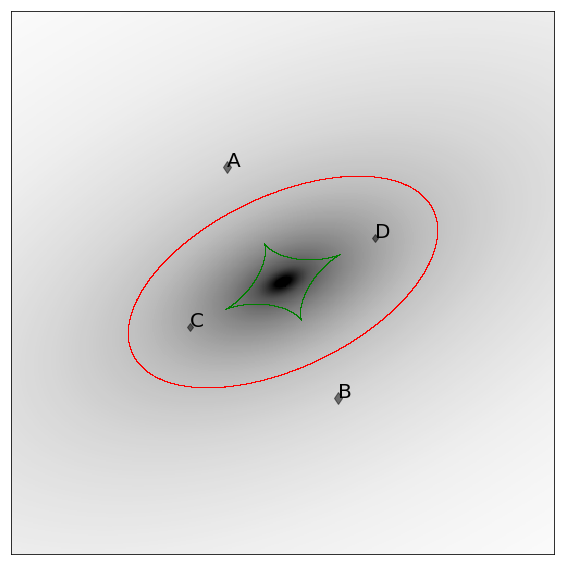

In [4]:
from lenstronomy.Plots import lens_plot

f, axex = plt.subplots(1, 1, figsize=(10, 10), sharex=False, sharey=False)
lens_plot.lens_model_plot(axex, lensModel=lensModel, kwargs_lens=kwargs_lens, sourcePos_x=beta_ra, sourcePos_y=beta_dec, point_source=True, with_caustics=True)
f.show()

### Parentesis sobre la elipticidad en lenstronomy

https://lenstronomy.readthedocs.io/en/latest/lenstronomy.Util.html?highlight=ellipticity#lenstronomy.Util.param_util.phi_q2_ellipticity

e1 y e2 es la excentricidad en modulo de elipticidad compleja definada como:

e1 = (1. - q) / (1. + q) * np.cos(2 * phi)

e2 = (1. - q) / (1. + q) * np.sin(2 * phi)

Donde phi es el angulo de orientacion en radianes y q la razon entre el semi eje menor y mayor. 

lenstronomy tiene dos modulos para convertir entre phi,q a e1 y e2 en el modulo param_util

- phi_q2_ellipticity(phi, q) pasa a e1 y e2
- ellipticity2phi_q(e1, e2) pasa a phi y q

### Ejercicio 1

Obtener la magnificacion, la convergencia y el shear para cada una de estas imagenes

In [ ]:
mag = #Complete
kappa = #Complete
gamma = #Complete

print(f'magnificacion {np.asarray(mag)}')
print('kappa:',kappa)
print(f'gamma: {gamma}')

## Ejercicio 2

Dados los parametros para el modelo:
- theta_E, phi, q, center_x, center_y

y la lista de posiciones para la fuente:
- beta_ra y beta_dec 

Calcule:

1. Cuantas imagenes se forman y en que posicion.
2. Grafique el sistema.
3. Cuanto es kappa y Gamma para cada imagen?
4. Discuta si el sistema es una Cruz de Eisntein, Cusp o Fold y porque.

In [ ]:
import lenstronomy.Util.param_util as param_util

e1,e2 = param_util.phi_q2_ellipticity(#complete
x1,x2=#complete
theta_E=#complete

kwargs_sie = {'theta_E': theta_E, 'e1':e1,'e2':e2,'center_x': x1, 'center_y': x2}
kwargs_lens = [kwargs_sie]

beta_ra, beta_dec = #complete
theta_ra, theta_dec = #complete
print('1.1 Se forman ', len(np.asarray(theta_ra)), 'imagenes')
print(f'1.2 Posicion de las images: ra = {theta_ra} dec = {theta_dec}')

f, axex = plt.subplots(1, 1, figsize=(10, 10), sharex=False, sharey=False)
lens_plot.lens_model_plot(axex, numPix=500,deltaPix=0.02, lensModel=lensModel, kwargs_lens=kwargs_lens, sourcePos_x=beta_ra, sourcePos_y=beta_dec, point_source=True, with_caustics=True,coord_center_ra=-x1, coord_center_dec=-x2)
f.show()

kappa = #complete
gamma = #complete

print('3 kappa:',kappa,'and gamma ',gamma)
print('4. la configuracion del sistema es ')

## Utilizacion de multiples modelos y Multiplane lensing

En esta clase nos basaremos en la starting guide de lenstronomy creada por Simon Birrer y disponible en:

https://github.com/sibirrer/lenstronomy_extensions/blob/master/lenstronomy_extensions/Notebooks/starting_guide.ipynb

In [5]:
# some standard python imports #
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

#lenstronomy imports
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
from lenstronomy.Plots import lens_plot
import lenstronomy.Util.param_util as param_util

### Elliptical power-law + shear

SPEP https://lenstronomy.readthedocs.io/en/latest/lenstronomy.LensModel.Profiles.html?highlight=spep#lenstronomy.LensModel.Profiles.spep.SPEP

SHEAR https://lenstronomy.readthedocs.io/en/latest/_modules/lenstronomy/LensModel/Profiles/shear.html?highlight=shear#

Para ver info sobre el perfil SPEP https://www.aanda.org/articles/aa/full_html/2015/08/aa26773-15/aa26773-15.html

In [6]:
lens_model_list = ['SPEP', 'SHEAR']
lensModel = LensModel(lens_model_list=lens_model_list)

kwargs_spep = {'theta_E': 1.1, 'e1': 0.1, 'e2': 0.05, 'gamma': 2., 'center_x': 0.1, 'center_y': 0}
kwargs_shear = {'gamma1': -0.01, 'gamma2': .03}
kwargs_lens = [kwargs_spep, kwargs_shear]

beta_ra, beta_dec = 0.01,0.2

solver = LensEquationSolver(lensModel)

#obtengo la posicion de las imagenes:
theta_ra, theta_dec = solver.image_position_from_source(beta_ra, beta_dec, kwargs_lens)
print(f' posicion de las images: ra = {theta_ra} dec = {theta_dec}')

 posicion de las images: ra = [-0.22451921  0.00098874 -0.69713207  0.96537303] dec = [ 1.40599171 -1.0253022  -0.61057687 -0.17498592]


/home/karina/miniconda3/envs/LENS/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


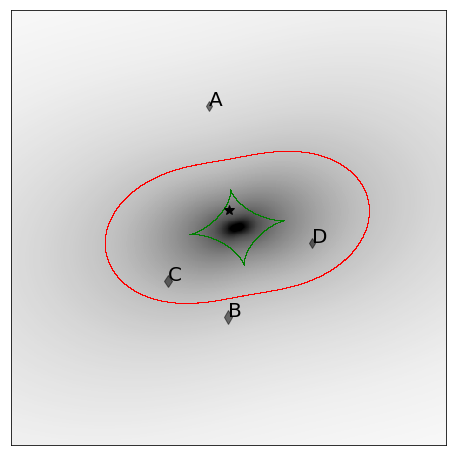

In [7]:
f, axex = plt.subplots(1, 1, figsize=(8, 8), sharex=False, sharey=False)
lens_plot.lens_model_plot(axex, lensModel=lensModel, kwargs_lens=kwargs_lens, sourcePos_x=beta_ra, sourcePos_y=beta_dec, point_source=True, with_caustics=True)
f.show()

**Asi como para la elipticidad, lenstronomy tiene en param_util modulos para convertir entre coord cartesianas y polares los valores del shear:**

https://lenstronomy.readthedocs.io/en/latest/lenstronomy.Util.html?highlight=shear#lenstronomy.Util.param_util.shear_cartesian2polar

In [8]:
shear_angle,shear_strength = param_util.shear_cartesian2polar(-0.01, .003)
gamma1,gamma2 = param_util.shear_polar2cartesian(shear_angle,shear_strength )
print(gamma1,gamma2)

-0.01 0.002999999999999998


## Multiplane lensing

El modulo LensModel permite poner modelos de deflectores a diferentes redshifts. Cuando no se especifica la cosmologia, se utiliza la clase que viene por defecto en Astropy.

- Astropy cosmology: https://docs.astropy.org/en/stable/cosmology/
- Lenstronomy Cosmo package https://lenstronomy.readthedocs.io/en/latest/lenstronomy.Cosmo.html?highlight=cosmology

En este ejemplo utilizaremos la misma configuracion que el sistema anterior pero agregaremos una lente modelada con una SIS a diferente redshift:

In [13]:
# Vamos a definir una lista de redshifts para cada modelo que vamos a implementar
redshift_list = [0.5, 0.5,0.1]

# Definimos el redshift de la fuente
z_source = 1.5

# Definimos la lista de modelos a usar en orden a los redshifts definidos anteriormente
lens_model_list_mp = ['SPEP', 'SHEAR', 'SIS']
lensModel_mp = LensModel(lens_model_list=lens_model_list_mp, z_source=z_source, lens_redshift_list=redshift_list, multi_plane=True)

#Definimos los parametros de cada modelo:
kwargs_spep = {'theta_E': 1.1, 'e1': 0.1, 'e2': 0.05, 'gamma': 2., 'center_x': 0.1, 'center_y': 0}
kwargs_shear = {'gamma1': -0.01, 'gamma2': .03}
kwargs_sis = {'theta_E': 0.1, 'center_x': 1.0, 'center_y': 0.0}
kwargs_lens_mp = [kwargs_spep, kwargs_shear, kwargs_sis]

beta_ra, beta_dec = 0.01,0.2
solver = LensEquationSolver(lensModel_mp)

#obtengo la posicion de las imagenes:
theta_ra_mp, theta_dec_mp = solver.image_position_from_source(beta_ra, beta_dec, kwargs_lens_mp)
print(f' posicion de las images: ra = {theta_ra_mp} dec = {theta_dec_mp}')

 posicion de las images: ra = [-0.29720869 -0.10465784 -0.78069744  0.95393909] dec = [ 1.47909108 -1.0929419  -0.65942624 -0.23458412]


/home/karina/miniconda3/envs/LENS/lib/python3.7/site-packages/lenstronomy/Plots/lens_plot.py:40: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(kappa_result), origin='lower', extent=[0, _frame_size, 0, _frame_size], cmap='Greys',
/home/karina/miniconda3/envs/LENS/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


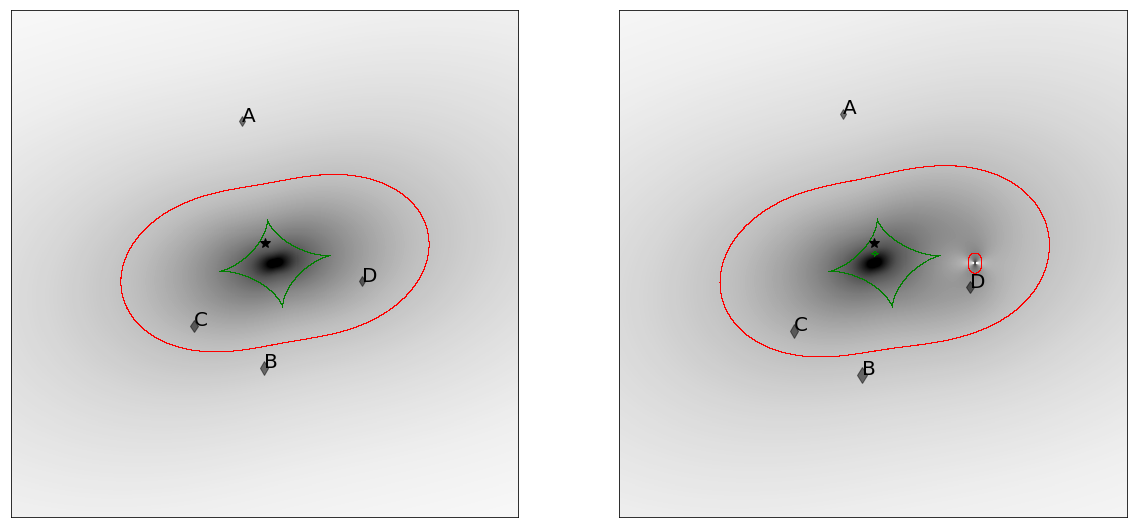

In [10]:
f, axex = plt.subplots(1, 2, figsize=(20,10), sharex=False, sharey=False)
lens_plot.lens_model_plot(axex[0], lensModel=lensModel, kwargs_lens=kwargs_lens, sourcePos_x=beta_ra, sourcePos_y=beta_dec, point_source=True, with_caustics=True)
lens_plot.lens_model_plot(axex[1], lensModel=lensModel_mp, kwargs_lens=kwargs_lens_mp, sourcePos_x=beta_ra, sourcePos_y=beta_dec, point_source=True, with_caustics=True)
f.show()

#### Pregunta

Las imagenes se vieron afectadas? 
Como?
Se puede cuantificar?

In [11]:
print('Desplazamiento de las imagenes:')
print(theta_ra-theta_ra_mp,theta_dec-theta_dec_mp)
mag = lensModel.magnification(theta_ra, theta_dec, kwargs_lens)
mag_mp = lensModel_mp.magnification(theta_ra_mp, theta_dec_mp, kwargs_lens_mp)
print('Diferencia en magnificacion:')
print(mag-mag_mp)

Desplazamiento de las imagenes:
[0.07268948 0.10564658 0.08356537 0.01143394] [-0.07309937  0.06763971  0.04884937  0.0595982 ]
Diferencia en magnificacion:
[-0.11462055 -0.47901791  0.41721843  1.18304432]


## Ejercicio

SDSS J1029+2623 es un quasar lente. El deflector en este caso es un cumulo de galaxias, el cual esta lentificando un quasar y produciendo 3 imagenes de este objeto.

En https://arxiv.org/pdf/0802.0002.pdf podemos ver las coordenadas de los 3 principales deflectores y sus redshifts, Utilizamos estos y los theta_E dados a continuacion:

- ra_d1 = 7.89,  dec_d1 = 14.90, z_d1 = 0.596, theta_E = 2.5
- ra_d2 = 8.93,  dec_d2 = 14.54, z_d2 = 0.601, theta_E = 1.5
- ra_d3 = 19.85, dec_d3 = 14.00, z_d3 = 0.584, theta_E = 0.8

Podemos utilizar un SPEP y fijar para todos ellos:

- e1 = 0.3, e2 = 0.01, gamma = 2.


Vamos fijar la posicion/redshift de la fuente en:

- beta_ra = 6.0  beta_dec = 13.2 z_s = 2.197

Consigan graficar un modelo que sea similar a la configuracion de SDSS J1029+2623 utilizando estos datos
  
<img src="1029.png">

In [ ]:
# Vamos a definir una lista de redshifts para cada modelo que vamos a implementar
redshift_list = #complete

# Definimos el redshift de la fuente
z_source =  #complete

# Definimos la lista de modelos a usar en orden a los redshifts definidos anteriormente
lens_model_list_mp =  #complete
lensModel_mp = LensModel(lens_model_list=lens_model_list_mp, z_source=z_source, lens_redshift_list=redshift_list, multi_plane=True)

#Definimos los parametros de cada modelo:
kwargs_spep1 = #complete
kwargs_spep2 = #complete
kwargs_spep3 = #complete
kwargs_lens_mp = [kwargs_spep1, kwargs_spep2, kwargs_spep3]

beta_ra, beta_dec = #complete
solver = LensEquationSolver(lensModel_mp)

#obtengo la posicion de las imagenes:
theta_ra_mp, theta_dec_mp = solver.image_position_from_source(beta_ra, beta_dec, kwargs_lens_mp,min_distance=0.05, search_window=0.05*1000)
print(f' posicion de las images: ra = {theta_ra_mp} dec = {theta_dec_mp}')

f, axex = plt.subplots(1, 1, figsize=(5, 5), sharex=False, sharey=False)
lens_plot.lens_model_plot(axex, numPix=1000,deltaPix=0.05, lensModel=lensModel_mp, kwargs_lens=kwargs_lens_mp, sourcePos_x=beta_ra, sourcePos_y=beta_dec, point_source=True, with_caustics=True,coord_center_ra=#complete, coord_center_dec=#complete)
f.show()